In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # 精确性分数

In [2]:
data = load_breast_cancer()  # 乳腺癌数据集
X = data.data
y = data.target

X.data.shape  # (569, 30)

(569, 30)

In [3]:
lrl1 = LR(penalty="l1", solver="liblinear", C=0.5, max_iter=1000)

lrl2 = LR(penalty="l2", solver="liblinear", C=0.5, max_iter=1000)

In [4]:
# 逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X, y)
lrl1.coef_

array([[ 3.99376516,  0.03174893, -0.1361989 , -0.01621332,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50462722,  0.        , -0.07127829,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24557712, -0.12847702, -0.01441524,  0.        ,
         0.        , -2.04704235,  0.        ,  0.        ,  0.        ]])

In [5]:
(lrl1.coef_ != 0).sum(axis=1)  # array([10])    30个特征中有10个特征的系数不为0

array([10])

In [6]:
lrl2 = lrl2.fit(X, y)
lrl2.coef_

array([[ 1.61331113e+00,  1.00124606e-01,  4.60084835e-02,
        -4.19839426e-03, -9.26228937e-02, -3.00484301e-01,
        -4.53250190e-01, -2.19778015e-01, -1.33074668e-01,
        -1.92576286e-02,  1.89635811e-02,  8.74998561e-01,
         1.32421950e-01, -9.53784315e-02, -9.62972408e-03,
        -2.53596204e-02, -5.83890299e-02, -2.67755115e-02,
        -2.73846616e-02, -8.05302922e-05,  1.28529688e+00,
        -3.00088054e-01, -1.74310770e-01, -2.23545072e-02,
        -1.70267493e-01, -8.77272211e-01, -1.15830085e+00,
        -4.22526360e-01, -4.12406225e-01, -8.66393364e-02]])

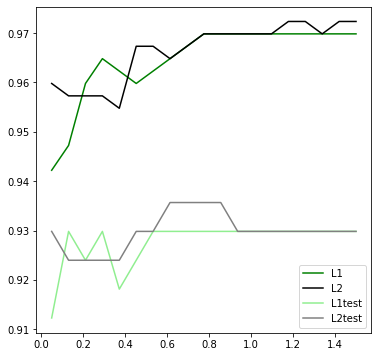

In [7]:
l1 = []
l2 = []
l1test = []
l2test = []

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, y, test_size=0.3, random_state=420)
for i in np.linspace(0.05, 1.5, 19):
    lrl1 = LR(penalty="l1", solver="liblinear", C=i, max_iter=1000)
    lrl2 = LR(penalty="l2", solver="liblinear", C=i, max_iter=1000)

    lrl1 = lrl1.fit(Xtrain, Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain), Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest), Ytest))
    lrl2 = lrl2.fit(Xtrain, Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain), Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest), Ytest))
graph = [l1, l2, l1test, l2test]
color = ["green", "black", "lightgreen", "gray"]
label = ["L1", "L2", "L1test", "L2test"]
plt.figure(figsize=(6, 6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05, 1.5, 19), graph[i], color[i], label=label[i])
plt.legend(loc=4)  # 图例的位置在哪里?4表示，右下角
plt.show()

## 逻辑回归的特征选择

In [8]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
data = load_breast_cancer()
data.data.shape

LR_ = LR(solver='liblinear', C=0.9, random_state=420)

cross_val_score(LR_, data.data, data.target, cv=10).mean()

0.9508145363408522

In [9]:
LR_ = LR(solver='liblinear', C=0.9, random_state=420)
cross_val_score(LR_, data.data, data.target, cv=10).mean()

0.9508145363408522

### 嵌入法Embedded

In [10]:
X_embedded = SelectFromModel(
    LR_, norm_order=1).fit_transform(data.data, data.target)
X_embedded.shape  # (569, 9)

(569, 9)

In [11]:
cross_val_score(LR_, X_embedded, data.target, cv=10).mean()

0.9368107769423559

0.0 	 30
0.10674043184877162 	 17
0.21348086369754324 	 12
0.32022129554631484 	 11
0.4269617273950865 	 8
0.5337021592438581 	 8
0.6404425910926297 	 6
0.7471830229414014 	 5
0.853923454790173 	 5
0.9606638866389445 	 5
1.0674043184877162 	 5
1.174144750336488 	 4
1.2808851821852594 	 2
1.387625614034031 	 2
1.4943660458828028 	 2
1.6011064777315742 	 1
1.707846909580346 	 1
1.8145873414291176 	 1
1.921327773277889 	 1
2.0280682051266608 	 1


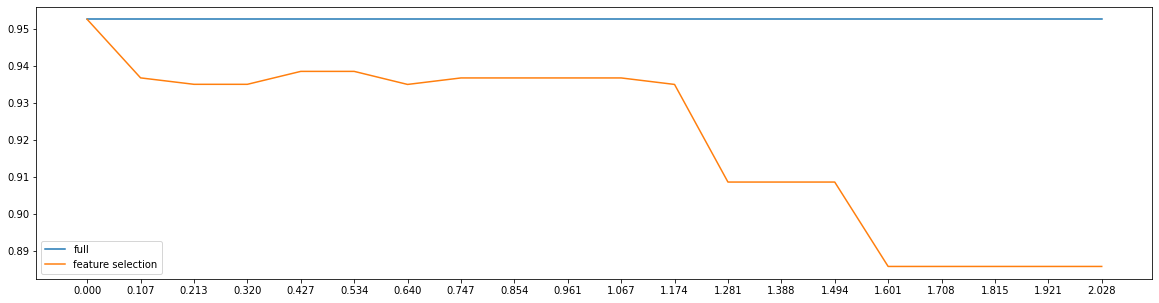

In [12]:
fullx = []
fsx = []

threshold = np.linspace(
    0, abs(LR_.fit(data.data, data.target).coef_).max(), 20)
fullx = [cross_val_score(LR_, data.data, data.target, cv=5).mean()] * 20
for i in threshold:
    X_embedded = SelectFromModel(
        LR_, threshold=i).fit_transform(data.data, data.target)
    fsx.append(cross_val_score(LR_, X_embedded, data.target, cv=5).mean())
    print(i, '\t', X_embedded.shape[1])
plt.figure(figsize=(20, 5))
plt.plot(threshold, fullx, label="full")
plt.plot(threshold, fsx, label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

调节threshold无效

0.9543546365914788 4.01


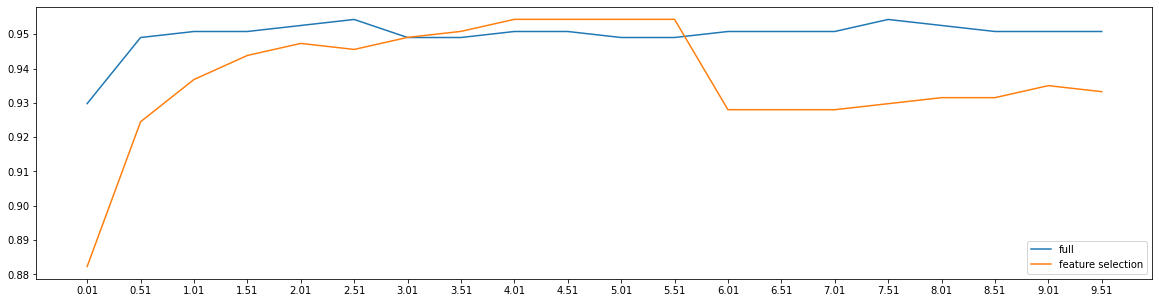

In [13]:
fullx = []
fsx = []

C = np.arange(0.01, 10.01, 0.5)

for i in C:
    LR_ = LR(solver="liblinear", C=i, random_state=420)

    fullx.append(cross_val_score(LR_, data.data, data.target, cv=10).mean())

    X_embedded = SelectFromModel(
        LR_, norm_order=1).fit_transform(data.data, data.target)
    fsx.append(cross_val_score(LR_, X_embedded, data.target, cv=10).mean())

print(max(fsx), C[fsx.index(max(fsx))])

plt.figure(figsize=(20, 5))
plt.plot(C, fullx, label="full")
plt.plot(C, fsx, label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

0.9561090225563911 5.81499999999994


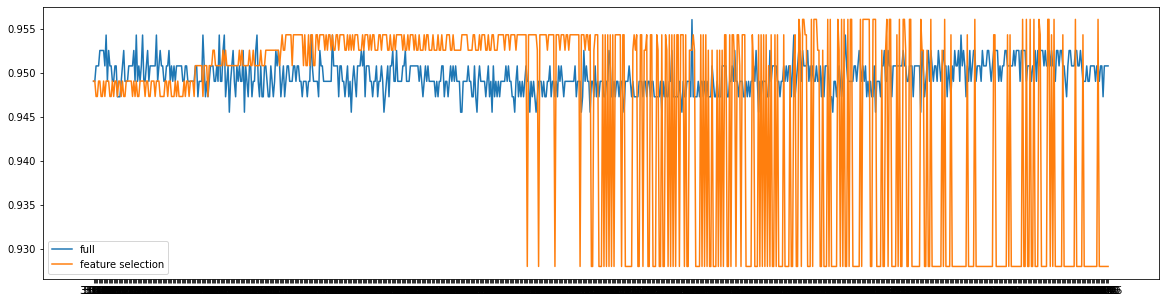

CPU times: user 1min 6s, sys: 2.14 s, total: 1min 8s
Wall time: 1min 8s


In [14]:
%%time
fullx = []
fsx = []

C = np.arange(3.01, 7.05, 0.005)

for i in C:
    LR_ = LR(solver="liblinear", C=i, random_state=420)

    fullx.append(cross_val_score(LR_, data.data, data.target, cv=10).mean())

    X_embedded = SelectFromModel(
        LR_, norm_order=1).fit_transform(data.data, data.target)
    fsx.append(cross_val_score(LR_, X_embedded, data.target, cv=10).mean())

print(max(fsx), C[fsx.index(max(fsx))])

plt.figure(figsize=(20, 5))
plt.plot(C, fullx, label="full")
plt.plot(C, fsx, label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [15]:
# 验证模型效果：降维之前
LR_ = LR(solver="liblinear", C=5.81499999999994, random_state=420)
cross_val_score(LR_, data.data, data.target, cv=10).mean()  # 0.9525689223057643

0.9525689223057643

In [16]:
# 验证模型效果：降维之后
LR_ = LR(solver="liblinear", C=5.81499999999994, random_state=420)
X_embedded = SelectFromModel(
    LR_, norm_order=1).fit_transform(data.data, data.target)
cross_val_score(LR_, X_embedded, data.target,
                cv=10).mean()  # 0.9561090225563911

0.9561090225563911

In [17]:
X_embedded.shape  # (569, 11)

(569, 11)

### 梯度下降：重要参数max_iter

/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


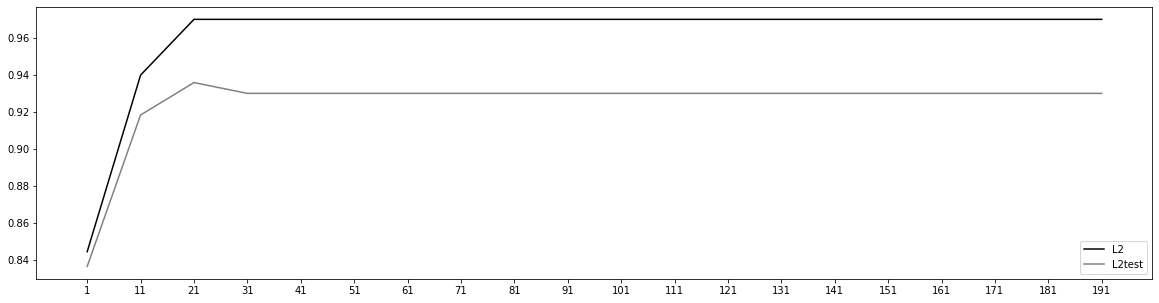

In [20]:
l2 = []
l2test = []

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, y, test_size=0.3, random_state=420)

for i in np.arange(1, 201, 10):
    lrl2 = LR(penalty='l2', solver='liblinear', C=0.9, max_iter=i)
    lrl2.fit(Xtrain, Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain), Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest), Ytest))
graph = [l2, l2test]
color = ["black", "gray"]
label = ["L2", "L2test"]

plt.figure(figsize=[20, 5])
for i in range(len(graph)):
    plt.plot(np.arange(1, 201, 10), graph[i], color[i], label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1, 201, 10))
plt.show()

In [21]:
# 我们可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
lr = LR(penalty='l2', solver='liblinear',
        C=0.9, max_iter=300).fit(Xtrain, Ytrain)
lr.n_iter_  # array([24], dtype=int32)  只迭代了24次就达到收敛

array([24], dtype=int32)